<a href="https://colab.research.google.com/github/Rogerio-mack/work/blob/main/Cox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install lifelines

In [16]:
import numpy as np
import pandas as pd
from lifelines import CoxPHFitter

In [17]:
data = pd.DataFrame({
    'Idade': [50, 60, 45, 55, 70],
    'Local_do_Cancer': [56,13,23,44,54],
#    'Local_do_Cancer': ['Pulmão', 'Mama', 'Próstata', 'Colorretal', 'Pulmão'],
    'Tratamento': [1,2,35,23,1],
#    'Tratamento': ['Quimioterapia', 'Radioterapia', 'Cirurgia', 'Cirurgia', 'Quimioterapia'],
    'Tempo_de_Sobrevivencia': [300, 450, 600, 700, 900],
})

coxph = CoxPHFitter()

coxph.fit(data, duration_col='Tempo_de_Sobrevivencia', event_col=None, show_progress=True)

print(coxph.summary)

Iteration 1: norm_delta = 4.22e+00, step_size = 0.9500, log_lik = -4.78749, newton_decrement = 3.45e+00, seconds_since_start = 0.0
Iteration 2: norm_delta = 2.30e+00, step_size = 0.9500, log_lik = -1.31584, newton_decrement = 6.26e-01, seconds_since_start = 0.0
Iteration 3: norm_delta = 2.55e+00, step_size = 0.9500, log_lik = -0.54698, newton_decrement = 2.56e-01, seconds_since_start = 0.0
Iteration 4: norm_delta = 2.75e+00, step_size = 0.9310, log_lik = -0.23406, newton_decrement = 1.12e-01, seconds_since_start = 0.0
Iteration 5: norm_delta = 2.88e+00, step_size = 0.9124, log_lik = -0.09915, newton_decrement = 4.83e-02, seconds_since_start = 0.0
Iteration 6: norm_delta = 2.95e+00, step_size = 0.8941, log_lik = -0.04187, newton_decrement = 2.06e-02, seconds_since_start = 0.0
Iteration 7: norm_delta = 2.99e+00, step_size = 0.8762, log_lik = -0.01780, newton_decrement = 8.79e-03, seconds_since_start = 0.0
Iteration 8: norm_delta = 3.01e+00, step_size = 0.8587, log_lik = -0.00766, newton_

/usr/local/lib/python3.10/dist-packages/lifelines/fitters/coxph_fitter.py:1589: ConvergenceWarning: The log-likelihood is getting suspiciously close to 0 and the delta is still large. There may be complete separation in the dataset. This may result in incorrect inference of coefficients. See https://stats.stackexchange.com/q/11109/11867 for more.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/lifelines/fitters/coxph_fitter.py:1614: ConvergenceWarning: Newton-Raphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model
  warnings.warn(


<Axes: >

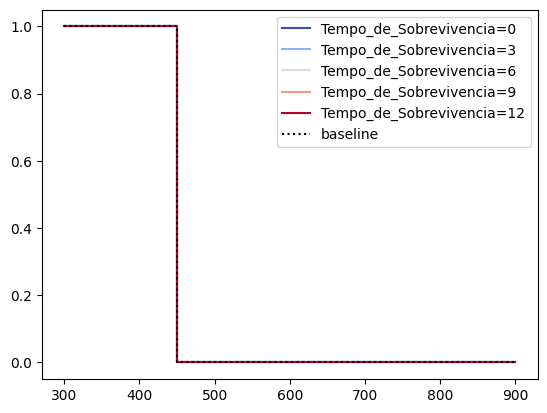

In [18]:
coxph.plot_partial_effects_on_outcome('Tempo_de_Sobrevivencia', values=np.arange(0, 15, 3), cmap='coolwarm')

In [19]:
coeficientes = coxph.summary.coef

def prever_tempo_vida(idade, local_cancer, tratamento):
    soma_ponderada = np.dot(coeficientes.values, [idade] + [local_cancer] + [tratamento])
    tempo_vida = np.exp(soma_ponderada)
    return tempo_vida

idade = 60
local_cancer = 56
tratamento = 1
tempo_vida_previsto = prever_tempo_vida(idade, local_cancer, tratamento)
print("Tempo de vida previsto para o paciente:", tempo_vida_previsto)


Tempo de vida previsto para o paciente: 9.843993259483305e-76


In [23]:
X = np.array([idade, local_cancer, tratamento])
coxph.predict_survival_function(X)


,0,1,2
300.0,1.000000,1.000000,1.000000
450.0,0.999974,0.999974,0.999974
600.0,0.215921,0.215921,0.215921
700.0,0.000000,0.000000,0.000000
900.0,0.000000,0.000000,0.000000


In [24]:
coxph.predict_median(X)


0    600.0
1    600.0
2    600.0
Name: 0.5, dtype: float64

In [25]:
coxph.predict_partial_hazard(X)

0    2.414671
1    2.414671
2    2.414671
dtype: float64